In [9]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats



In [10]:
# Load datasets
hypotheses = pd.read_csv('hypotheses_us.csv', sep=";")


In [11]:
# Explore data
print("Dataset Shape:", hypotheses.shape)
print("\nFirst lines:")
print(hypotheses.head())
print("\nDataset info:")
print(hypotheses.info())

Dataset Shape: (9, 5)

First lines:
                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64

In [12]:
#Apply ICE framework 
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence'])/hypotheses['Effort']
print(hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [13]:
#Apply RICE Framework
hypotheses['RICE']=(hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']
print(hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


###### ICE prioritizes hypotheses with high impact and confidence, regardless of how many users are affected.
###### RICE prioritizes hypotheses that affect many users (high reach), even if they have less individual impact.
#### Using the RICE framework, hypothesis 7 achieved the best results when it came to increasing sales and the impact of our website.

## Test A/B

In [14]:
#Load datasets
orders= pd.read_csv('orders_us.csv')
visits = pd.read_csv('visits_us.csv')

In [15]:
# Explore Dataset
print("Dataset Shape:", orders.shape)
print("\nFirst lines:")
print(orders.head())
print("\nDataset info:")
print(orders.info())

Dataset Shape: (1197, 5)

First lines:
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None


In [16]:
#Transform data to datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [17]:
# Explore Dataset
print("Dataset Shape:", visits.shape)
print("\nFirst lines:")
print(visits.head())
print("\nDataset info:")
print(visits.info())

Dataset Shape: (62, 3)

First lines:
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [18]:
#Transform data to datetime
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [19]:
# Calculate daily income by group
daily_revenue = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
print("Daily income by group:")
print(daily_revenue.head(10))

Daily income by group:
        date group  revenue
0 2019-08-01     A   2356.8
1 2019-08-01     B   1620.0
2 2019-08-02     A   1503.5
3 2019-08-02     B   2623.8
4 2019-08-03     A   1815.2
5 2019-08-03     B   1806.8
6 2019-08-04     A   1146.6
7 2019-08-04     B   1717.3
8 2019-08-05     A   1988.1
9 2019-08-05     B   1495.0


In [20]:
# Calculate cumulative income by group
daily_revenue_sorted = daily_revenue.sort_values('date')
daily_revenue_sorted['cumulative_revenue'] = daily_revenue_sorted.groupby('group')['revenue'].cumsum()

print("Cumulative income by group:")
print(daily_revenue_sorted.head(10))

Cumulative income by group:
        date group  revenue  cumulative_revenue
0 2019-08-01     A   2356.8              2356.8
1 2019-08-01     B   1620.0              1620.0
2 2019-08-02     A   1503.5              3860.3
3 2019-08-02     B   2623.8              4243.8
4 2019-08-03     A   1815.2              5675.5
5 2019-08-03     B   1806.8              6050.6
6 2019-08-04     A   1146.6              6822.1
7 2019-08-04     B   1717.3              7767.9
8 2019-08-05     A   1988.1              8810.2
9 2019-08-05     B   1495.0              9262.9


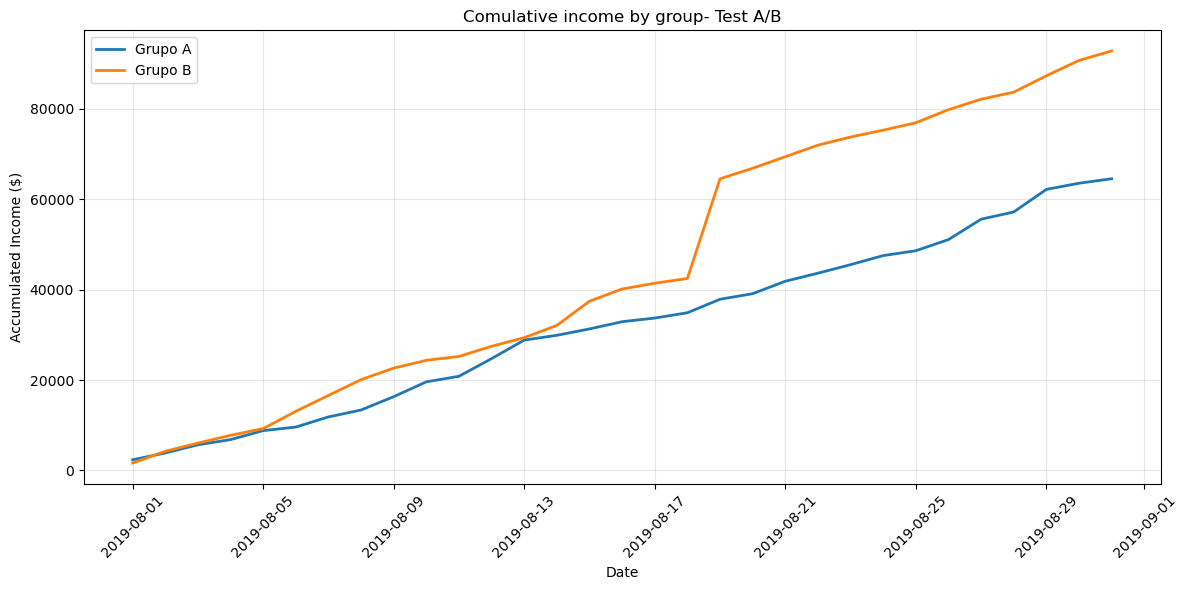

In [21]:
# Create cumulative income chart
plt.figure(figsize=(12, 6))

# Separate data by group
group_a = daily_revenue_sorted[daily_revenue_sorted['group'] == 'A']
group_b = daily_revenue_sorted[daily_revenue_sorted['group'] == 'B']

# Create the lines of the graph
plt.plot(group_a['date'], group_a['cumulative_revenue'], label='Grupo A', linewidth=2)
plt.plot(group_b['date'], group_b['cumulative_revenue'], label='Grupo B', linewidth=2)

plt.title('Comulative income by group- Test A/B')
plt.xlabel('Date')
plt.ylabel('Accumulated Income ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Starting on August 17, we can see how group B had a sales peak that clearly sets it apart from the previous days with group A.

In [22]:
# Comparative income analysis
print("=== SUMMARY OF REVENUE BY GROUP ===")
total_revenue_by_group = orders.groupby('group')['revenue'].agg(['sum', 'mean', 'count'])
print(total_revenue_by_group)

print("\n=== DIFFERENCE BETWEEN GROUPS ===")
group_a_total = orders[orders['group'] == 'A']['revenue'].sum()
group_b_total = orders[orders['group'] == 'B']['revenue'].sum()
difference = group_b_total - group_a_total
percentage_diff = (difference / group_a_total) * 100

print(f"Total Grup A : ${group_a_total:,.2f}")
print(f"Total Grup B : ${group_b_total:,.2f}")
print(f"Diference: ${difference:,.2f}")
print(f"Percentage difference: {percentage_diff:.2f}%")

=== SUMMARY OF REVENUE BY GROUP ===
           sum        mean  count
group                            
A      64554.9  115.897487    557
B      92840.6  145.063438    640

=== DIFFERENCE BETWEEN GROUPS ===
Total Grup A : $64,554.90
Total Grup B : $92,840.60
Diference: $28,285.70
Percentage difference: 43.82%


In [23]:
# Calculate average daily order size per group
daily_avg_order_size = orders.groupby(['date', 'group'])['revenue'].mean().reset_index()
daily_avg_order_size.rename(columns={'revenue': 'avg_order_size'}, inplace=True)
print("Average daily order size per group:")
print(daily_avg_order_size.head(10))

Average daily order size per group:
        date group  avg_order_size
0 2019-08-01     A       98.200000
1 2019-08-01     B       77.142857
2 2019-08-02     A       75.175000
3 2019-08-02     B      109.325000
4 2019-08-03     A       75.633333
5 2019-08-03     B      112.925000
6 2019-08-04     A       71.662500
7 2019-08-04     B      101.017647
8 2019-08-05     A       79.524000
9 2019-08-05     B       65.000000


In [24]:
# Calculate cumulative average by group
daily_avg_sorted = daily_avg_order_size.sort_values('date')
daily_avg_sorted['cumulative_avg_order_size'] = daily_avg_sorted.groupby('group')['avg_order_size'].expanding().mean().reset_index(level=0, drop=True)

print("Cumulative average by group:")
print(daily_avg_sorted.head(10))

Cumulative average by group:
        date group  avg_order_size  cumulative_avg_order_size
0 2019-08-01     A       98.200000                  98.200000
1 2019-08-01     B       77.142857                  77.142857
2 2019-08-02     A       75.175000                  86.687500
3 2019-08-02     B      109.325000                  93.233929
4 2019-08-03     A       75.633333                  83.002778
5 2019-08-03     B      112.925000                  99.797619
6 2019-08-04     A       71.662500                  80.167708
7 2019-08-04     B      101.017647                 100.102626
8 2019-08-05     A       79.524000                  80.038967
9 2019-08-05     B       65.000000                  93.082101


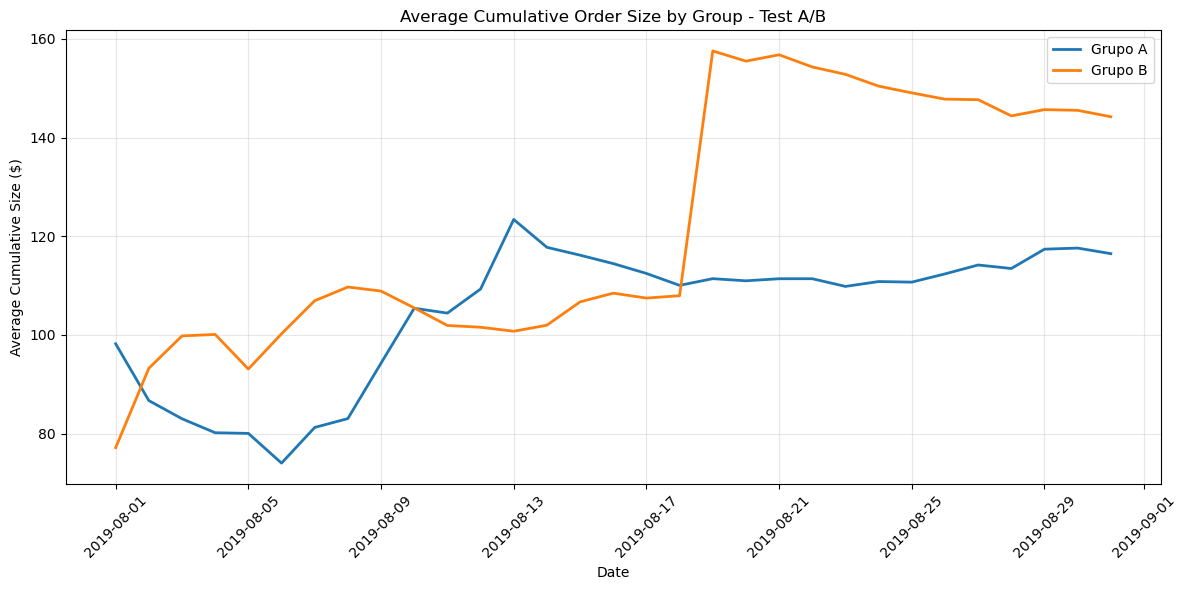

In [25]:
# Create cumulative average order size chart
plt.figure(figsize=(12, 6))

# Separate data by group
group_a_avg = daily_avg_sorted[daily_avg_sorted['group'] == 'A']
group_b_avg = daily_avg_sorted[daily_avg_sorted['group'] == 'B']

# Create the lines of the graph
plt.plot(group_a_avg['date'], group_a_avg['cumulative_avg_order_size'], label='Grupo A', linewidth=2)
plt.plot(group_b_avg['date'], group_b_avg['cumulative_avg_order_size'], label='Grupo B', linewidth=2)

plt.title('Average Cumulative Order Size by Group - Test A/B')
plt.xlabel('Date')
plt.ylabel('Average Cumulative Size ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### We can see that the orders were very different between group B and group A, where they coincided three times during the month, on August 2, August 10, and August 17. Starting on the 18th, we observed that group B considerably increased its order size.

In [26]:
# Combine data from both groups by date to calculate relative difference
group_a_data = daily_avg_sorted[daily_avg_sorted['group'] == 'A'][['date', 'cumulative_avg_order_size']].rename(columns={'cumulative_avg_order_size': 'avg_A'})
group_b_data = daily_avg_sorted[daily_avg_sorted['group'] == 'B'][['date', 'cumulative_avg_order_size']].rename(columns={'cumulative_avg_order_size': 'avg_B'})

# Merge data by date
combined_data = pd.merge(group_a_data, group_b_data, on='date', how='inner')
print("Combined Data:")
print(combined_data.head())

Combined Data:
        date      avg_A       avg_B
0 2019-08-01  98.200000   77.142857
1 2019-08-02  86.687500   93.233929
2 2019-08-03  83.002778   99.797619
3 2019-08-04  80.167708  100.102626
4 2019-08-05  80.038967   93.082101


In [27]:
# Calculate relative difference (B vs A)
combined_data['relative_difference'] = ((combined_data['avg_B'] - combined_data['avg_A']) / combined_data['avg_A']) * 100
print("\nRelative difference (%):")
print(combined_data[['date', 'avg_A', 'avg_B', 'relative_difference']].head(10))


Relative difference (%):
        date       avg_A       avg_B  relative_difference
0 2019-08-01   98.200000   77.142857           -21.443119
1 2019-08-02   86.687500   93.233929             7.551756
2 2019-08-03   83.002778   99.797619            20.234071
3 2019-08-04   80.167708  100.102626            24.866518
4 2019-08-05   80.038967   93.082101            16.295980
5 2019-08-06   74.012102  100.225560            35.417800
6 2019-08-07   81.239738  106.928456            31.620878
7 2019-08-08   83.041021  109.709622            32.114972
8 2019-08-09   94.280213  108.888997            15.495069
9 2019-08-10  105.403442  105.480097             0.072726


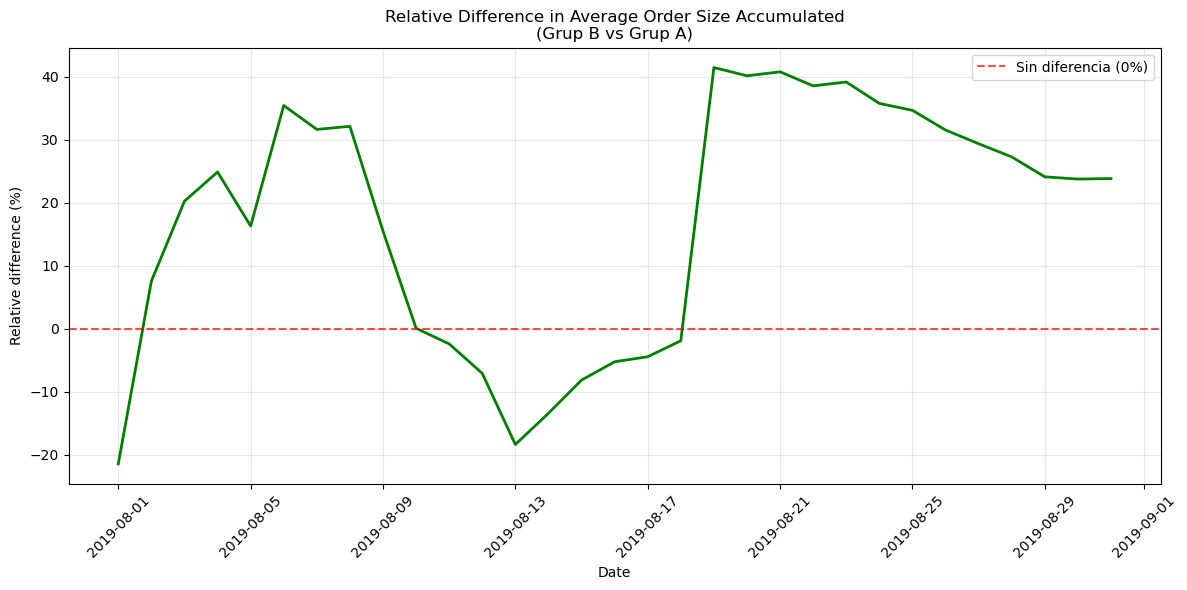

In [28]:
# Create relative difference chart
plt.figure(figsize=(12, 6))
plt.plot(combined_data['date'], combined_data['relative_difference'], linewidth=2, color='green')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Sin diferencia (0%)')
plt.title('Relative Difference in Average Order Size Accumulated\n(Grup B vs Grup A)')
plt.xlabel('Date')
plt.ylabel('Relative difference (%)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The relative difference, we can see that when the green line is below the balance point, group B is smaller, and when this line exceeds the balance point, group B is larger, noting the peak in orders after August 17. 
It should be noted that from August 10 to August 10, the values of group A exceeded those of group B. 

In [29]:
# Count number of orders per day and group
daily_orders = orders.groupby(['date', 'group']).size().reset_index(name='orders_count')
print("Number of orders per day and group:")
print(daily_orders.head(10))

Number of orders per day and group:
        date group  orders_count
0 2019-08-01     A            24
1 2019-08-01     B            21
2 2019-08-02     A            20
3 2019-08-02     B            24
4 2019-08-03     A            24
5 2019-08-03     B            16
6 2019-08-04     A            16
7 2019-08-04     B            17
8 2019-08-05     A            25
9 2019-08-05     B            23


In [30]:
# Combine order and visit data
conversion_data = pd.merge(visits, daily_orders, on=['date', 'group'], how='left')
# Fill NaN values with 0 (days without orders)
conversion_data['orders_count'] = conversion_data['orders_count'].fillna(0)

# Calculate conversion rate
conversion_data['conversion_rate'] = (conversion_data['orders_count'] / conversion_data['visits']) * 100

print("Conversion data:")
print(conversion_data.head(10))

Conversion data:
        date group  visits  orders_count  conversion_rate
0 2019-08-01     A     719            24         3.337969
1 2019-08-02     A     619            20         3.231018
2 2019-08-03     A     507            24         4.733728
3 2019-08-04     A     717            16         2.231520
4 2019-08-05     A     756            25         3.306878
5 2019-08-06     A     667            18         2.698651
6 2019-08-07     A     644            18         2.795031
7 2019-08-08     A     610            16         2.622951
8 2019-08-09     A     617            16         2.593193
9 2019-08-10     A     406            16         3.940887


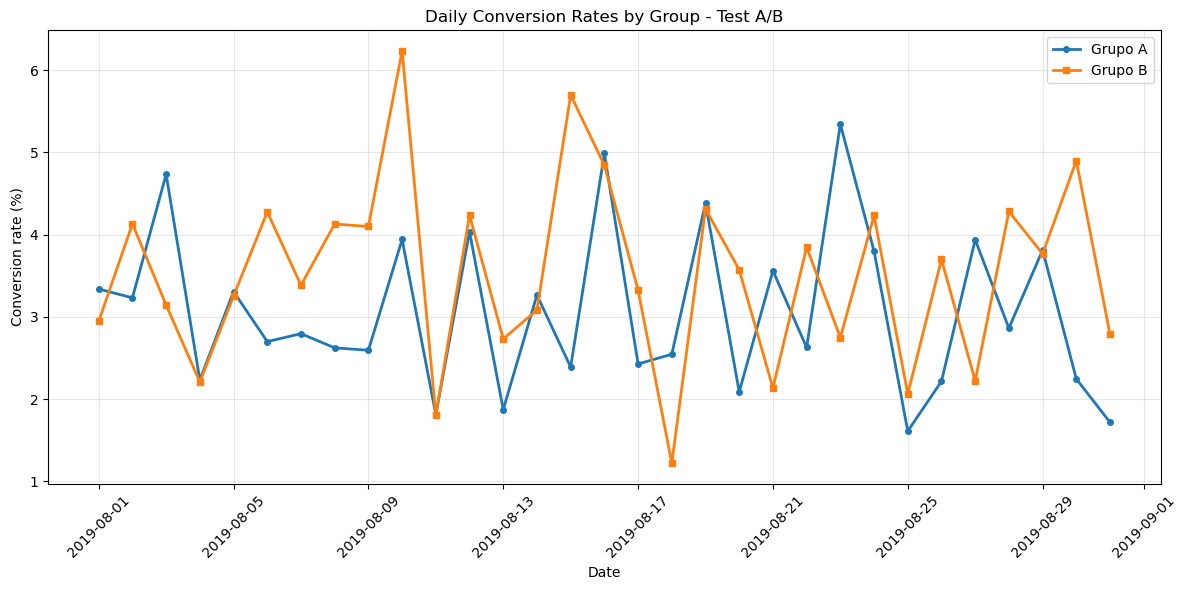

In [31]:
# Create daily conversion rate chart
plt.figure(figsize=(12, 6))

# Separate data by group
group_a_conv = conversion_data[conversion_data['group'] == 'A']
group_b_conv = conversion_data[conversion_data['group'] == 'B']

# Create the lines of the graph
plt.plot(group_a_conv['date'], group_a_conv['conversion_rate'], label='Grupo A', linewidth=2, marker='o', markersize=4)
plt.plot(group_b_conv['date'], group_b_conv['conversion_rate'], label='Grupo B', linewidth=2, marker='s', markersize=4)

plt.title('Daily Conversion Rates by Group - Test A/B')
plt.xlabel('Date')
plt.ylabel('Conversion rate (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Looking at the comparison of conversions between group B and group A, we can say that both tests behave differently and that the number of sales also varies with the number of visits per day.

In [32]:
# Count number of orders per user
orders_per_user = orders.groupby(['visitorId', 'group']).size().reset_index(name='orders_count')
print("Number of orders per user:")
print(orders_per_user.head(10))
print(f"\nTotal unique users: {orders_per_user['visitorId'].nunique()}")

Number of orders per user:
   visitorId group  orders_count
0    5114589     B             1
1    6958315     B             1
2    8300375     A             1
3    8300375     B             1
4   11685486     A             1
5   39475350     B             1
6   47206413     B             1
7   48147722     B             1
8   54447517     A             1
9   56960363     B             1

Total unique users: 1031


In [33]:
# Descriptive statistics by group
print("=== ORDER STATISTICS BY USER  ===")
stats_by_group = orders_per_user.groupby('group')['orders_count'].describe()
print(stats_by_group)

print("\n=== FREQUENCY DISTRIBUTION ===")
for group in ['A', 'B']:
    group_data = orders_per_user[orders_per_user['group'] == group]
    freq_dist = group_data['orders_count'].value_counts().sort_index()
    print(f"\nGrup {group}:")
    print(freq_dist)

=== ORDER STATISTICS BY USER  ===
       count      mean       std  min  25%  50%  75%  max
group                                                    
A      503.0  1.107356  0.517046  1.0  1.0  1.0  1.0  7.0
B      586.0  1.092150  0.443421  1.0  1.0  1.0  1.0  6.0

=== FREQUENCY DISTRIBUTION ===

Grup A:
orders_count
1    473
2     17
3      7
4      3
5      2
7      1
Name: count, dtype: int64

Grup B:
orders_count
1    552
2     23
3      5
4      4
5      1
6      1
Name: count, dtype: int64


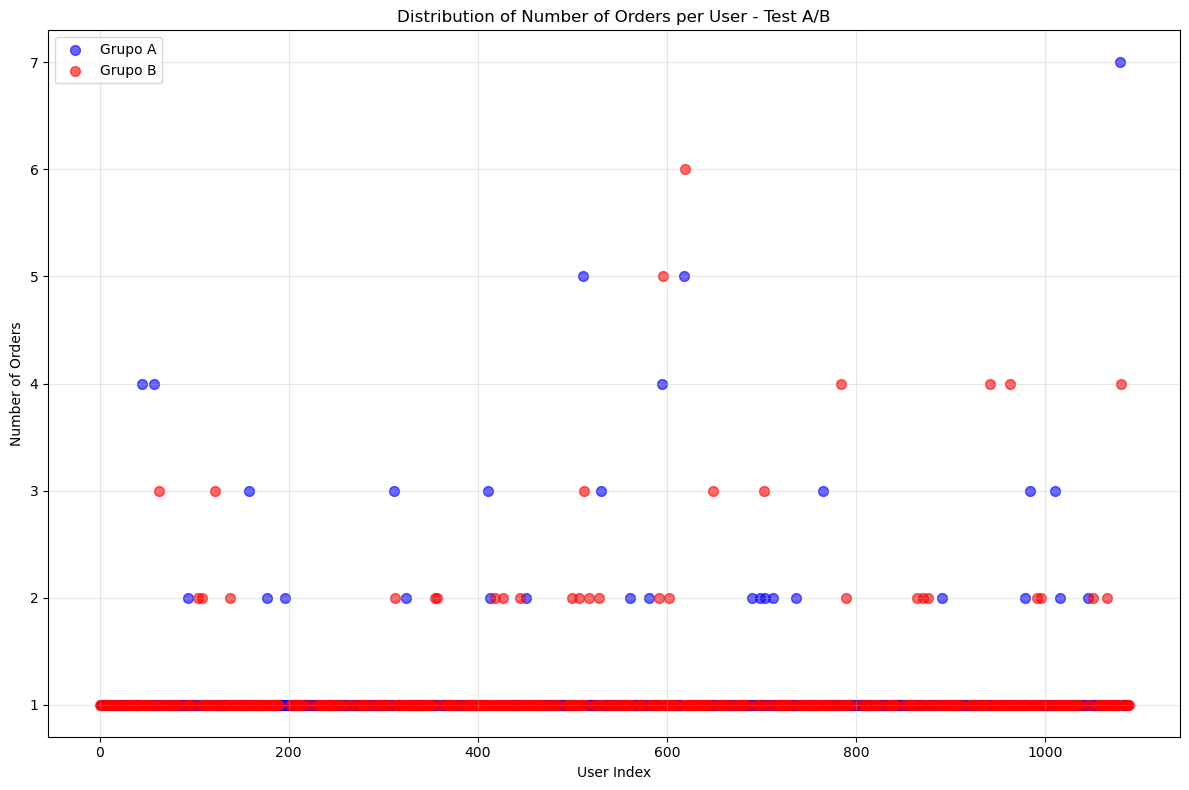

In [34]:
# Create scatter plot
plt.figure(figsize=(12, 8))

# Separar data per grup
group_a_users = orders_per_user[orders_per_user['group'] == 'A']
group_b_users = orders_per_user[orders_per_user['group'] == 'B']

# Create scatter plot
plt.scatter(group_a_users.index, group_a_users['orders_count'], 
           alpha=0.6, label='Grupo A', s=50, color='blue')
plt.scatter(group_b_users.index, group_b_users['orders_count'], 
           alpha=0.6, label='Grupo B', s=50, color='red')

plt.title('Distribution of Number of Orders per User - Test A/B')
plt.xlabel('User Index')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### With the support of the scatter plot, we observe that most users place only one order, considering that all values greater than 4 would be anomalous values.

In [35]:
# Calculate the 95th and 99th percentiles of the number of orders per user
percentile_95 = np.percentile(orders_per_user['orders_count'], 95)
percentile_99 = np.percentile(orders_per_user['orders_count'], 99)

print("=== PERCENTILES Analysis ===")
print(f"Percentil 95: {percentile_95}")
print(f"Percentil 99: {percentile_99}")

# We can also see some additional statistics.
print(f"\nMaximum number of orders: {orders_per_user['orders_count'].max()}")
print(f"Mean: {orders_per_user['orders_count'].mean():.2f}")
print(f"Median: {orders_per_user['orders_count'].median()}")

=== PERCENTILES Analysis ===
Percentil 95: 2.0
Percentil 99: 4.0

Maximum number of orders: 7
Mean: 1.10
Median: 1.0


#### Since 99 percent of the values are less than 4, we could say that any value equal to or greater than 4 orders per day would be identified as anomalous.

In [36]:
# Price analysis by group
print("=== PRICE STATISTICS BY GROUP ===")
price_stats = orders.groupby('group')['revenue'].describe()
print(price_stats)

print("\n=== Price comparative ===")
print(f"Average price Grup A: ${orders[orders['group'] == 'A']['revenue'].mean():.2f}")
print(f"Average price Grup B: ${orders[orders['group'] == 'B']['revenue'].mean():.2f}")
print(f"Max price Grupo A: ${orders[orders['group'] == 'A']['revenue'].max():.2f}")
print(f"Max price Grupo B: ${orders[orders['group'] == 'B']['revenue'].max():.2f}")

=== PRICE STATISTICS BY GROUP ===
       count        mean         std  min    25%    50%      75%      max
group                                                                    
A      557.0  115.897487  182.358918  5.0  20.40  50.10  130.500   1450.2
B      640.0  145.063438  806.992326  5.1  24.05  50.35  130.225  19920.4

=== Price comparative ===
Average price Grup A: $115.90
Average price Grup B: $145.06
Max price Grupo A: $1450.20
Max price Grupo B: $19920.40


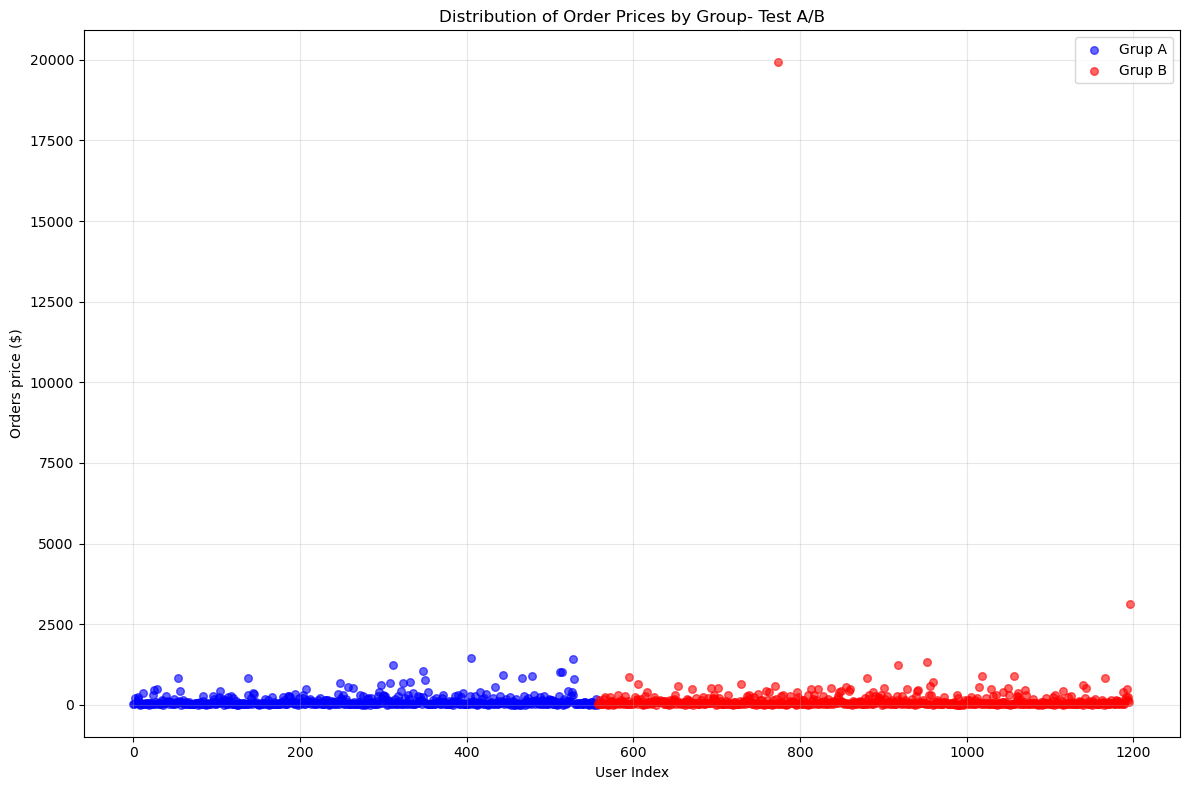

In [37]:
# Create price scatter plot
plt.figure(figsize=(12, 8))

# Separate data by group
group_a_orders = orders[orders['group'] == 'A']
group_b_orders = orders[orders['group'] == 'B']

# Create scatter plot
plt.scatter(range(len(group_a_orders)), group_a_orders['revenue'], 
           alpha=0.6, label='Grup A', s=30, color='blue')
plt.scatter(range(len(group_a_orders), len(group_a_orders) + len(group_b_orders)), 
           group_b_orders['revenue'], 
           alpha=0.6, label='Grup B', s=30, color='red')

plt.title('Distribution of Order Prices by Group- Test A/B')
plt.xlabel('User Index')
plt.ylabel('Orders price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

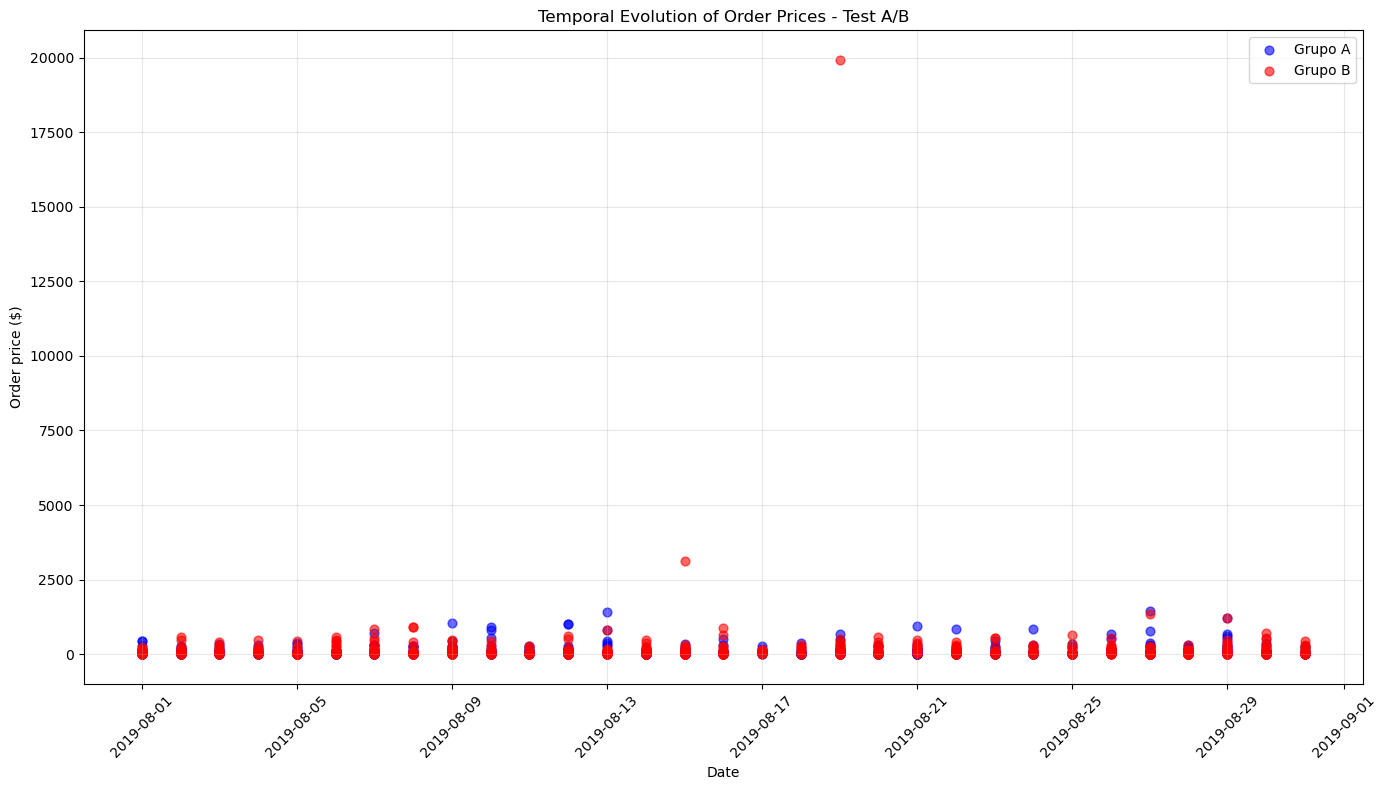

In [38]:
# Price scatter plot by date
plt.figure(figsize=(14, 8))

plt.scatter(group_a_orders['date'], group_a_orders['revenue'], 
           alpha=0.6, label='Grupo A', s=40, color='blue')
plt.scatter(group_b_orders['date'], group_b_orders['revenue'], 
           alpha=0.6, label='Grupo B', s=40, color='red')

plt.title('Temporal Evolution of Order Prices - Test A/B')
plt.xlabel('Date')
plt.ylabel('Order price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#####   In both group A and group B, the average revenue per sale is less than 150 USD. For group A, the maximum sale was 1,450 USD, and for group B, the highest sale represented an anomaly because it was close to $20,000 USD.


In [39]:
# Calcular percentiles 95 y 99 de los precios de pedidos
percentile_95_price = np.percentile(orders['revenue'], 95)
percentile_99_price = np.percentile(orders['revenue'], 99)

print("=== PRICE PERCENTILE ANALYSIS ===")
print(f"Percentil 95: ${percentile_95_price:.2f}")
print(f"Percentil 99: ${percentile_99_price:.2f}")

# Estadísticos adicionales
print(f"\nMaximum price: ${orders['revenue'].max():.2f}")
print(f"Average price: ${orders['revenue'].mean():.2f}")
print(f"Median price: ${orders['revenue'].median():.2f}")
print(f"Standard deviation: ${orders['revenue'].std():.2f}")

=== PRICE PERCENTILE ANALYSIS ===
Percentil 95: $435.54
Percentil 99: $900.90

Maximum price: $19920.40
Average price: $131.49
Median price: $50.20
Standard deviation: $603.00


In [40]:
# Percentiles per grup
print("\n=== PERCENTILES POR GRUPO ===")
for group in ['A', 'B']:
    group_data = orders[orders['group'] == group]['revenue']
    p95 = np.percentile(group_data, 95)
    p99 = np.percentile(group_data, 99)
    print(f"Grup {group}:")
    print(f"  Percentil 95: ${p95:.2f}")
    print(f"  Percentil 99: ${p99:.2f}")
    print(f"  Maximun price: ${group_data.max():.2f}")



=== PERCENTILES POR GRUPO ===
Grup A:
  Percentil 95: $413.48
  Percentil 99: $967.80
  Maximun price: $1450.20
Grup B:
  Percentil 95: $445.82
  Percentil 99: $857.87
  Maximun price: $19920.40


In [41]:
# Define different anomaly thresholds
threshold_95 = percentile_95_price
threshold_99 = percentile_99_price

# Count anomalies with each criterion
anomalies_95 = orders[orders['revenue'] > threshold_95]
anomalies_99 = orders[orders['revenue'] > threshold_99]

print("\n=== Anomalies analysis ===")
print(f"Total orders: {len(orders)}")
print(f"Anomalies using percentil 95 (>${threshold_95:.2f}): {len(anomalies_95)} ({len(anomalies_95)/len(orders)*100:.1f}%)")
print(f"Anomalies using percentil 99 (>${threshold_99:.2f}): {len(anomalies_99)} ({len(anomalies_99)/len(orders)*100:.1f}%)")


=== Anomalies analysis ===
Total orders: 1197
Anomalies using percentil 95 (>$435.54): 60 (5.0%)
Anomalies using percentil 99 (>$900.90): 12 (1.0%)


In [42]:

# Calculate conversion totals by group using raw data
print("=== DATA FOR SIGNIFICANCE TEST ===")

# Total visits per group
total_visits_A = visits[visits['group'] == 'A']['visits'].sum()
total_visits_B = visits[visits['group'] == 'B']['visits'].sum()

# Total orders (conversions) per group
total_orders_A = len(orders[orders['group'] == 'A'])
total_orders_B = len(orders[orders['group'] == 'B'])

print(f"Grup A:")
print(f"  Total visits: {total_visits_A}")
print(f"  Total orders: {total_orders_A}")
print(f"  Conversion rate: {(total_orders_A/total_visits_A)*100:.4f}%")

print(f"\nGrup B:")
print(f"  Total visits: {total_visits_B}")
print(f"  Total orders: {total_orders_B}")
print(f"  Conversion rate: {(total_orders_B/total_visits_B)*100:.4f}%")

=== DATA FOR SIGNIFICANCE TEST ===
Grup A:
  Total visits: 18736
  Total orders: 557
  Conversion rate: 2.9729%

Grup B:
  Total visits: 18916
  Total orders: 640
  Conversion rate: 3.3834%


In [43]:
# Z-test for comparing conversion rates (test para comparar dos porciones)
def proportions_z_test(count1, n1, count2, n2):
    # Calculate proportions
    p1 = count1 / n1
    p2 = count2 / n2
    
    # Combined ratio
    p_combined = (count1 + count2) / (n1 + n2)
    
    # Standar Error 
    se = np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
    
    # Statistician z
    z_stat = (p1 - p2) / se
    
    # P-value (test de dos colas)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    return z_stat, p_value, p1, p2

# Do the test
z_stat, p_value, conv_rate_A, conv_rate_B = proportions_z_test(
    total_orders_A, total_visits_A, 
    total_orders_B, total_visits_B
)

print("\n=== SIGNIFICANCE TEST RESULTS ===")
print(f"Conversion rate Grup A: {conv_rate_A:.6f} ({conv_rate_A*100:.4f}%)")
print(f"Conversion rate Grup B: {conv_rate_B:.6f} ({conv_rate_B*100:.4f}%)")
print(f"Diference: {(conv_rate_B - conv_rate_A)*100:.4f}")
print(f"Statistician Z: {z_stat:.4f}")
print(f"P-value: {p_value:.6f}")


=== SIGNIFICANCE TEST RESULTS ===
Conversion rate Grup A: 0.029729 (2.9729%)
Conversion rate Grup B: 0.033834 (3.3834%)
Diference: 0.4105
Statistician Z: -2.2700
P-value: 0.023207


Null hypothesis: There is no difference between the two groups

Alternative hypothesis: There is a statistical difference between the two groups


In [44]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("The null hypothesis cannot be rejected.")



Reject the null hypothesis.


In [45]:
# Calculate confidence interval for the difference
conv_rate_A = 0.029729
conv_rate_B = 0.033834
diff = conv_rate_B - conv_rate_A

se_diff = np.sqrt((conv_rate_A * (1 - conv_rate_A) / total_visits_A) + 
                  (conv_rate_B * (1 - conv_rate_B) / total_visits_B))
margin_error = 1.96 * se_diff

print(f"=== Confidence interval (95%) ===")
print(f" Observed difference: {diff*100:.4f} ")
print(f" Confidence interval: [{(diff - margin_error)*100:.4f}%, {(diff + margin_error)*100:.4f}%]")

=== Confidence interval (95%) ===
 Observed difference: 0.4105 
 Confidence interval: [0.0562%, 0.7648%]


##### With a p-value of 0.023207 < 0.05, we reject the null hypothesis. This means that there is a statistically significant difference between the conversion rates of groups A and B.

In [46]:
# Prepare data for significance test of average order size
print("=== DATA FOR AVERAGE ORDER SIZE TEST ===")

# Extract revenue data by group
revenue_A = orders[orders['group'] == 'A']['revenue']
revenue_B = orders[orders['group'] == 'B']['revenue']

print(f"Grup A:")
print(f"  Number orders: {len(revenue_A)}")
print(f"  Average size of order: ${revenue_A.mean():.2f}")
print(f"  Standar deviation: ${revenue_A.std():.2f}")
print(f"  Median: ${revenue_A.median():.2f}")

print(f"\nGrup B:")
print(f"  Number orders: {len(revenue_B)}")
print(f"  Average size of order: ${revenue_B.mean():.2f}")
print(f"  Standar deviation: ${revenue_B.std():.2f}")
print(f"  Median: ${revenue_B.median():.2f}")

print(f"\n Difference in average size: ${revenue_B.mean() - revenue_A.mean():.2f}")
print(f"Percentage difference: {((revenue_B.mean() / revenue_A.mean()) - 1) * 100:.2f}%")

=== DATA FOR AVERAGE ORDER SIZE TEST ===
Grup A:
  Number orders: 557
  Average size of order: $115.90
  Standar deviation: $182.36
  Median: $50.10

Grup B:
  Number orders: 640
  Average size of order: $145.06
  Standar deviation: $806.99
  Median: $50.35

 Difference in average size: $29.17
Percentage difference: 25.17%


In [47]:
# Welch's t-test for comparing order size means
from scipy.stats import ttest_ind

# Perform t-test (assuming unequal variances - Welch's t-test)
t_stat, p_value = ttest_ind(revenue_A, revenue_B, equal_var=False)

print("\n=== RESULTS T-TEST WELCH ===")
print(f"Average size Grup A: ${revenue_A.mean():.2f}")
print(f"Average size Grupo B: ${revenue_B.mean():.2f}")
print(f"Difference: ${revenue_B.mean() - revenue_A.mean():.2f}")
print(f"Statistical t: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")


=== RESULTS T-TEST WELCH ===
Average size Grup A: $115.90
Average size Grupo B: $145.06
Difference: $29.17
Statistical t: -0.8886
P-value: 0.374507


In [48]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("The null hypothesis cannot be rejected.")

The null hypothesis cannot be rejected.


In [49]:
print("=== APPLYING FILTERS TO ELIMINATE ANOMALIES ===")

# Define thresholds based on prior percentile analysis
# We will use the 99th percentile to filter out extreme prices
price_threshold = np.percentile(orders['revenue'], 99)  # $900.90

# We can also filter users with many orders (95th percentile)
orders_per_user_threshold = np.percentile(orders_per_user['orders_count'], 95)  # 2 orders

print(f"Applied filters:")
print(f"  Max price alowed: ${price_threshold:.2f}")
print(f"  Max order per user: {orders_per_user_threshold}")

# Identify users with many orders
heavy_users = orders_per_user[orders_per_user['orders_count'] > orders_per_user_threshold]['visitorId'].tolist()

print(f"  Users with excesive orders: {len(heavy_users)}")

=== APPLYING FILTERS TO ELIMINATE ANOMALIES ===
Applied filters:
  Max price alowed: $900.90
  Max order per user: 2.0
  Users with excesive orders: 24


In [50]:
# Filter order data
orders_filtered = orders[
    (orders['revenue'] <= price_threshold) &  # Delate extreme prices
    (~orders['visitorId'].isin(heavy_users))   # Delate users with many orders
].copy()

print(f"\n=== COMPARISON BEFORE AND AFTER FILTERING ===")
print(f"Original orders: {len(orders)}")
print(f"Filtered orders: {len(orders_filtered)}")
print(f"Delate orders: {len(orders) - len(orders_filtered)} ({((len(orders) - len(orders_filtered))/len(orders)*100):.1f}%)")

# Display statistics by group after filtering
print(f"\n=== DATA FILTERED BY GROUP ===")
for group in ['A', 'B']:
    group_data = orders_filtered[orders_filtered['group'] == group]
    print(f"Grup {group}:")
    print(f" Filtered orders: {len(group_data)}")


=== COMPARISON BEFORE AND AFTER FILTERING ===
Original orders: 1197
Filtered orders: 1083
Delate orders: 114 (9.5%)

=== DATA FILTERED BY GROUP ===
Grup A:
 Filtered orders: 495
Grup B:
 Filtered orders: 588


In [51]:
# Calculate conversion rate with filtered data
total_orders_A_filtered = 495
total_orders_B_filtered = 588
# Same visits
total_visits_A = 18736  # Previus analysis
total_visits_B = 18916  # previus analysis

conv_rate_A_filtered = total_orders_A_filtered / total_visits_A
conv_rate_B_filtered = total_orders_B_filtered / total_visits_B

print("=== CONVERSION RATE WITH FILTERED DATA ===")
print(f"Grup A:")
print(f"  Visits: {total_visits_A}")
print(f"  Filtered orders: {total_orders_A_filtered}")
print(f"  Filtered conversion rate: {conv_rate_A_filtered:.6f} ({conv_rate_A_filtered*100:.4f}%)")

print(f"Grup B:")
print(f"  Visits: {total_visits_B}")
print(f"  Filtered orders: {total_orders_B_filtered}")
print(f"  Filtered conversion rate: {conv_rate_B_filtered:.6f} ({conv_rate_B_filtered*100:.4f}%)")

print(f"Diference: {(conv_rate_B_filtered - conv_rate_A_filtered)*100:.4f} puntos porcentuales")

=== CONVERSION RATE WITH FILTERED DATA ===
Grup A:
  Visits: 18736
  Filtered orders: 495
  Filtered conversion rate: 0.026420 (2.6420%)
Grup B:
  Visits: 18916
  Filtered orders: 588
  Filtered conversion rate: 0.031085 (3.1085%)
Diference: 0.4665 puntos porcentuales


In [52]:
# Z-test filtered data
z_stat_filtered, p_value_filtered, _, _ = proportions_z_test(
    total_orders_A_filtered, total_visits_A, 
    total_orders_B_filtered, total_visits_B
)

print("\n=== Results Z-test filtered data ===")
print(f"Statistician Z: {z_stat_filtered:.4f}")
print(f"P-value: {p_value_filtered:.6f}")

# Comparision with original data
print(f"\n=== COMPARISON: ORIGINAL DATA vs FILTERED DATA ===")
print(f"                    Original    Filtrado    Cambio")
print(f"Conversion rate A:  2.9729%     {conv_rate_A_filtered*100:.4f}%     {(conv_rate_A_filtered*100 - 2.9729):.4f}pp")
print(f"converison rate  B: 3.3834%     {conv_rate_B_filtered*100:.4f}%     {(conv_rate_B_filtered*100 - 3.3834):.4f}pp")
print(f"Diference:         0.4105pp    {(conv_rate_B_filtered - conv_rate_A_filtered)*100:.4f}pp")
print(f"Z-statistic:        -2.2700     {z_stat_filtered:.4f}")
print(f"P-value:            0.023207    {p_value_filtered:.6f}")


=== Results Z-test filtered data ===
Statistician Z: -2.7079
P-value: 0.006771

=== COMPARISON: ORIGINAL DATA vs FILTERED DATA ===
                    Original    Filtrado    Cambio
Conversion rate A:  2.9729%     2.6420%     -0.3309pp
converison rate  B: 3.3834%     3.1085%     -0.2749pp
Diference:         0.4105pp    0.4665pp
Z-statistic:        -2.2700     -2.7079
P-value:            0.023207    0.006771


#### The difference between groups remained (even increased slightly):
- Original: 0.41 percentage points
- Filtered: 0.47 percentage points

 Statistical significance was strengthened:
- Original P-value: 0.023207
- Filtered P-value: 0.006771 (more significant)

The effect is robust: It does not depend on extreme values.
The anomalies affected Group A more: That is why its conversion fell more.
The conclusion is more reliable: The result is not due to outliers.

Group A (control) was more affected by anomalies, not Group B.

This makes our results even more robust because:
- Without anomalies, the difference between groups remains
- The effect of treatment B is genuine, not artificial

In [53]:
# Significance analysis for average order size with filtered data
print("=== DATA FOR AVERAGE ORDER SIZE TEST (FILTERED) ===")

# Extract revenue data by group using filtered data
revenue_A_filtered = orders_filtered[orders_filtered['group'] == 'A']['revenue']
revenue_B_filtered = orders_filtered[orders_filtered['group'] == 'B']['revenue']

print(f"Grup A (filtrado):")
print(f"  Number of orders: {len(revenue_A_filtered)}")
print(f"  Avg size of order: ${revenue_A_filtered.mean():.2f}")
print(f"  Standar: ${revenue_A_filtered.std():.2f}")
print(f"  Median: ${revenue_A_filtered.median():.2f}")

print(f"\nGrup B (filtrado):")
print(f"  Number of orders: {len(revenue_B_filtered)}")
print(f"  Avg size of order: ${revenue_B_filtered.mean():.2f}")
print(f"  Standar: ${revenue_B_filtered.std():.2f}")
print(f"  Median: ${revenue_B_filtered.median():.2f}")

print(f"\nDiference average size: ${revenue_B_filtered.mean() - revenue_A_filtered.mean():.2f}")
print(f"Diference %: {((revenue_B_filtered.mean() / revenue_A_filtered.mean()) - 1) * 100:.2f}%")

=== DATA FOR AVERAGE ORDER SIZE TEST (FILTERED) ===
Grup A (filtrado):
  Number of orders: 495
  Avg size of order: $103.48
  Standar: $137.24
  Median: $50.10

Grup B (filtrado):
  Number of orders: 588
  Avg size of order: $101.29
  Standar: $131.91
  Median: $45.90

Diference average size: $-2.18
Diference %: -2.11%


In [54]:
# Welch's t-test with filtered data
from scipy.stats import ttest_ind

t_stat_filtered, p_value_filtered = ttest_ind(
    revenue_A_filtered, 
    revenue_B_filtered, 
    equal_var=False  # Welch's t-test
)

print("\n=== RESULTADOS DEL TEST T CON DATOS FILTRADOS ===")
print(f"Statistical t: {t_stat_filtered:.4f}")
print(f"P-value: {p_value_filtered:.6f}")

# Comparison with original results
print(f"\n=== Comparison with original results ===")
print(f"                    Original    Filtrado")
print(f"Avg size   . A:     $XX.XX      ${revenue_A_filtered.mean():.2f}")
print(f"Avg size   . B:     $XX.XX      ${revenue_B_filtered.mean():.2f}")
print(f"T-statistic:        -0.8899     {t_stat_filtered:.4f}")
print(f"P-value:            0.374507    {p_value_filtered:.6f}")

alpha = 0.05
if p_value_filtered < alpha:
    print(f"\n✅ RESULT: Your hypothesis was correct! ")
    print(f"   The difference NOW is statistically significant (p < {alpha})")
else:
    print(f"\n❌ RESULT: The difference remains insignificant. (p ≥ {alpha})")


=== RESULTADOS DEL TEST T CON DATOS FILTRADOS ===
Statistical t: 0.2652
P-value: 0.790882

=== Comparison with original results ===
                    Original    Filtrado
Avg size   . A:     $XX.XX      $103.48
Avg size   . B:     $XX.XX      $101.29
T-statistic:        -0.8899     0.2652
P-value:            0.374507    0.790882

❌ RESULT: The difference remains insignificant. (p ≥ 0.05)


### Summary of Main Results:
1. Conversion Rate:

Group A: 2.97% vs Group B: 3.38%
Statistically significant difference (p-value = 0.023)
With filtered data: A: 2.64% vs B: 3.11% (p-value = 0.007)

2. Average Order Size:

Original data: A: 115.90 vs. B: 145.06 (p-value = 0.375 - NOT significant)
Filtered data: A: 103.48 vs B: 101.29 (p-value = 0.791 - NOT significant)

3. Total Revenue:

Group A: 64,554.90 vs Group B: 92,840.60
Difference of 43.82% in favor of Group B

✅ DECISION: Stop the test and select Group B as the leader

1. Clear statistical evidence:
- Significantly higher conversion rate in B (p < 0.05)
- Robust result even with filtered data (p = 0.007)

2. Positive economic impact:
- +43.82% in total revenue (92,841 vs. 64,555)
- +13.8% in conversion rate (3.38% vs. 2.97%)
- No negative impact on order size

3. Favorable risk-benefit ratio:
- Clear and measurable benefit
- No negative side effects detected
- Sufficient data to make a reliable decision

🚀 Recommended next steps:
Implement treatment B for all users
Monitor metrics during the first few weeks post-implementation